## Link Streamlit: https://data-analyst-lkwtauosferhujcr5uobnv.streamlit.app/
## Link Github: https://github.com/annisareida/Data-Analyst/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Wrangling

In [3]:
file_path = "/content/used_car_dataset.csv"
df = pd.read_csv(file_path)

# Data Availability Checking

In [4]:
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:")
print(df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB
None

Missing Values:
Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

Duplicate Rows:
724


In [5]:
df = df.dropna(subset=['kmDriven'])

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Brand           0
model           0
Year            0
Age             0
kmDriven        0
Transmission    0
Owner           0
FuelType        0
PostedDate      0
AdditionInfo    0
AskPrice        0
dtype: int64


In [7]:
print("Baris dengan Nilai Kosong:")
print(df[df.isnull().any(axis=1)])

Baris dengan Nilai Kosong:
Empty DataFrame
Columns: [Brand, model, Year, Age, kmDriven, Transmission, Owner, FuelType, PostedDate, AdditionInfo, AskPrice]
Index: []


In [8]:
print("\nSummary of 'AskPrice':")
print(df['AskPrice'].describe())


Summary of 'AskPrice':
count           9535
unique          1326
top       ₹ 4,50,000
freq             131
Name: AskPrice, dtype: object


# Descriptive Statistic

In [9]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              Year          Age
count  9535.000000  9535.000000
mean   2016.375669     7.624331
std       4.071090     4.071090
min    1986.000000     0.000000
25%    2014.000000     5.000000
50%    2017.000000     7.000000
75%    2019.000000    10.000000
max    2024.000000    38.000000


# Exploratory Data Analysis

In [10]:
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   object
dtypes: int64(2), object(9)
memory usage: 893.9+ KB
None


In [11]:
print("\nBeberapa baris pertama dari dataset:")
print(df.head())


Beberapa baris pertama dari dataset:
           Brand      model  Year  Age     kmDriven Transmission   Owner  \
0          Honda       City  2001   23    98,000 km       Manual  second   
1         Toyota     Innova  2009   15  190000.0 km       Manual  second   
2     Volkswagen  VentoTest  2010   14    77,246 km       Manual   first   
3  Maruti Suzuki      Swift  2017    7    83,500 km       Manual  second   
4  Maruti Suzuki     Baleno  2019    5    45,000 km    Automatic   first   

  FuelType PostedDate                                       AdditionInfo  \
0   Petrol     Nov-24  Honda City v teck in mint condition, valid gen...   
1   Diesel     Jul-24  Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...   
2   Diesel     Nov-24  Volkswagen Vento 2010-2013 Diesel Breeze, 2010...   
3   Diesel     Nov-24     Maruti Suzuki Swift 2017 Diesel Good Condition   
4   Petrol     Nov-24       Maruti Suzuki Baleno Alpha CVT, 2019, Petrol   

     AskPrice  
0  ₹ 1,95,000  
1  ₹ 3,75,000  


In [12]:
# Mengonversi kolom 'kmDriven' menjadi numerik
df['kmDriven'] = df['kmDriven'].replace({' km': '', ',': ''}, regex=True).astype(float)

# Mengonversi kolom 'AskPrice' menjadi numerik
df['AskPrice'] = df['AskPrice'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Menampilkan beberapa baris untuk memastikan perubahan
print(df[['kmDriven', 'AskPrice']].head())

   kmDriven  AskPrice
0   98000.0  195000.0
1  190000.0  375000.0
2   77246.0  184999.0
3   83500.0  565000.0
4   45000.0  685000.0


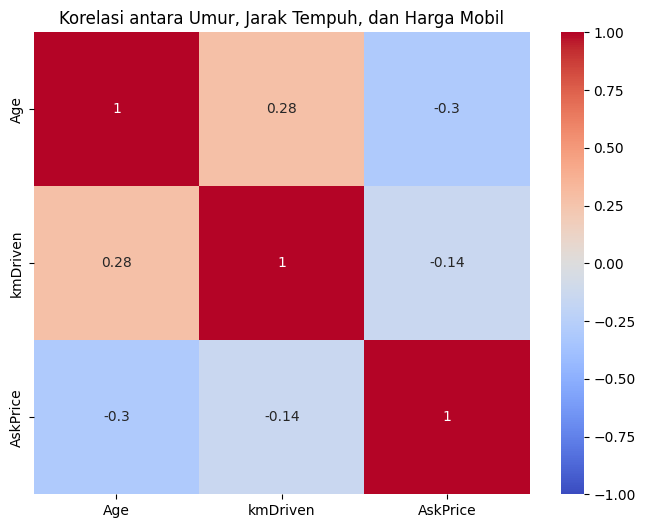

In [13]:
corr = df[['Age', 'kmDriven', 'AskPrice']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara Umur, Jarak Tempuh, dan Harga Mobil')
plt.show()


# Data Visualization

Distribusi Harga Mobil (AskPrice):

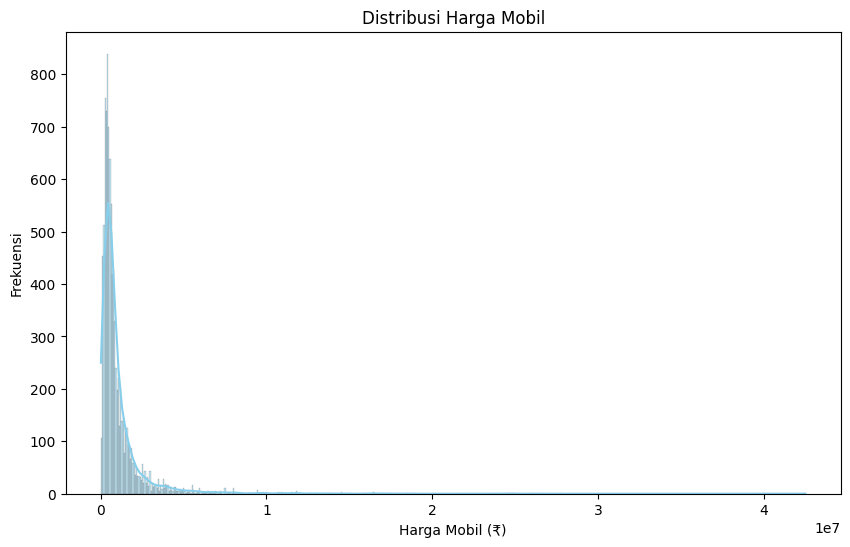

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AskPrice'], kde=True, color='skyblue')
plt.title('Distribusi Harga Mobil')
plt.xlabel('Harga Mobil (₹)')
plt.ylabel('Frekuensi')
plt.show()


Hubungan antara Umur Mobil (Age) dan Harga Mobil (AskPrice):

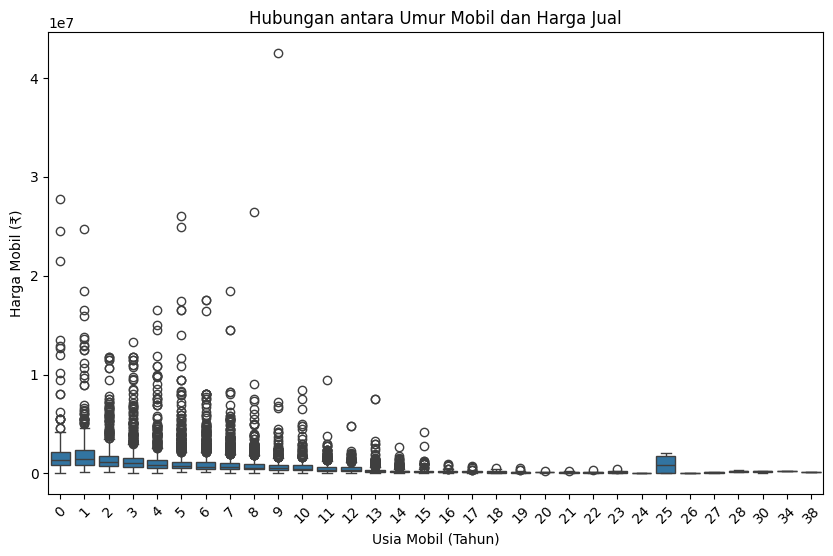

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='AskPrice', data=df)
plt.title('Hubungan antara Umur Mobil dan Harga Jual')
plt.xlabel('Usia Mobil (Tahun)')
plt.ylabel('Harga Mobil (₹)')
plt.xticks(rotation=45)
plt.show()


Perbandingan berdasarkan Tipe Transmisi, Jenis Bahan Bakar, dan Status Pemilik:

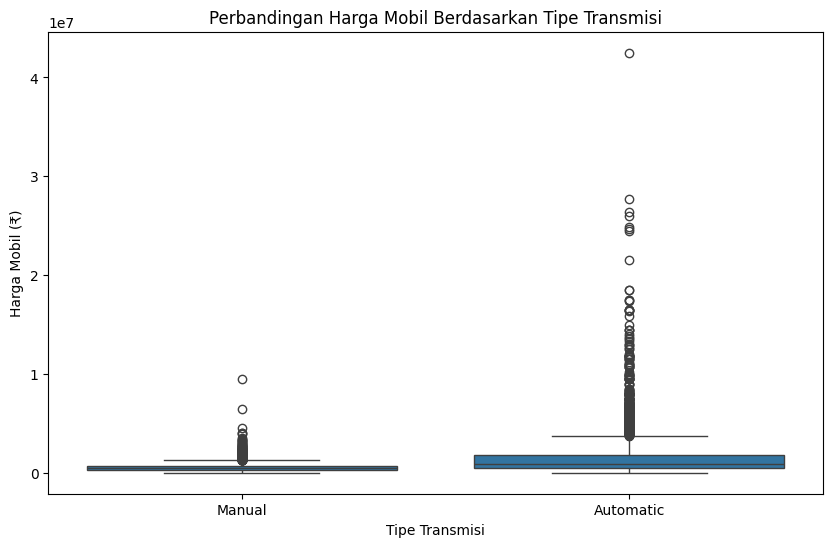

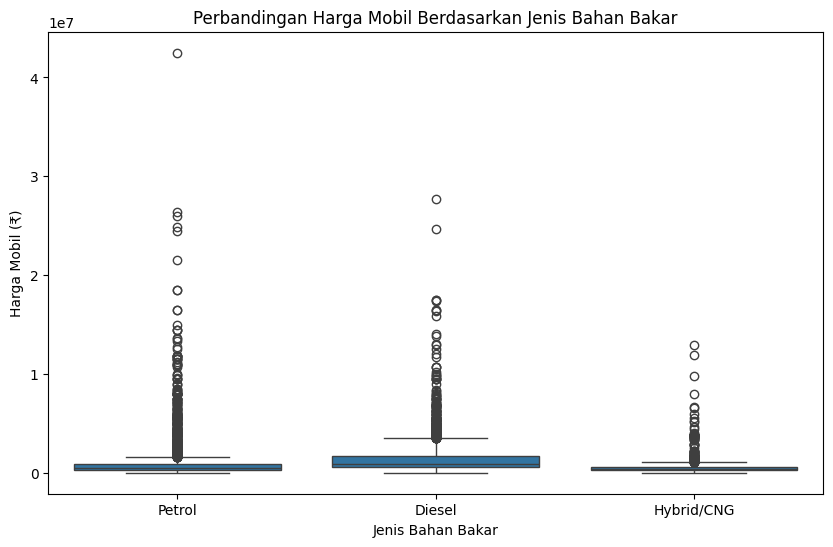

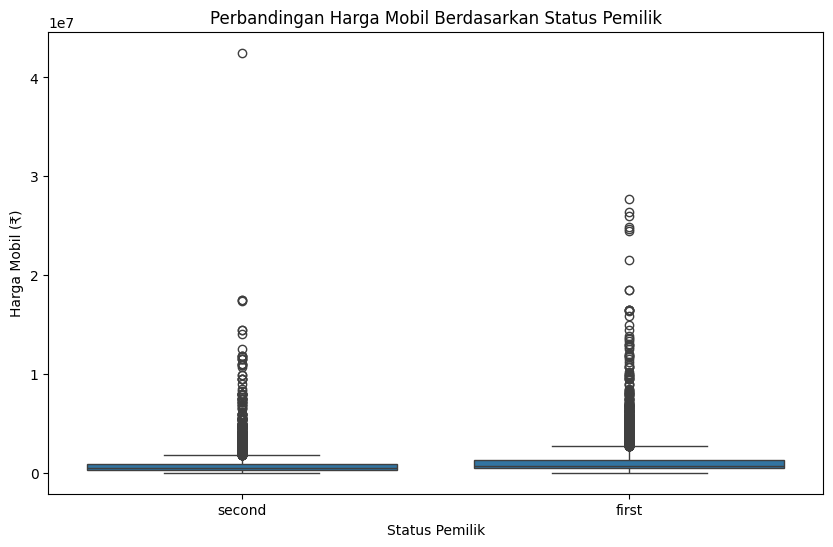

In [16]:
# Tipe Transmisi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='AskPrice', data=df)
plt.title('Perbandingan Harga Mobil Berdasarkan Tipe Transmisi')
plt.xlabel('Tipe Transmisi')
plt.ylabel('Harga Mobil (₹)')
plt.show()

# Jenis Bahan Bakar
plt.figure(figsize=(10, 6))
sns.boxplot(x='FuelType', y='AskPrice', data=df)
plt.title('Perbandingan Harga Mobil Berdasarkan Jenis Bahan Bakar')
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Harga Mobil (₹)')
plt.show()

# Status Pemilik
plt.figure(figsize=(10, 6))
sns.boxplot(x='Owner', y='AskPrice', data=df)
plt.title('Perbandingan Harga Mobil Berdasarkan Status Pemilik')
plt.xlabel('Status Pemilik')
plt.ylabel('Harga Mobil (₹)')
plt.show()
